In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import json
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pycaret
from pycaret.regression import *
from pycaret.regression import (setup, compare_models, tune_model)
import category_encoders as ce

In [2]:
df = pd.read_csv('disaster_df_eda.csv')
df.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength
0,1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0
1,2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0
2,3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0
3,4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0
4,5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0


In [3]:
df.shape

(53350, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53350 entries, 0 to 53349
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   disasterNumber     53350 non-null  int64 
 1   state              53350 non-null  object
 2   declarationType    53350 non-null  object
 3   fyDeclared         53350 non-null  int64 
 4   incidentType       53350 non-null  object
 5   declarationTitle   53350 non-null  object
 6   ihProgramDeclared  53350 non-null  int64 
 7   iaProgramDeclared  53350 non-null  int64 
 8   paProgramDeclared  53350 non-null  int64 
 9   hmProgramDeclared  53350 non-null  int64 
 10  incidentBeginDate  53350 non-null  object
 11  incidentEndDate    53350 non-null  object
 12  designatedArea     53350 non-null  object
 13  incidentLength     53350 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 5.7+ MB


In [5]:
df['Month'] = df['incidentBeginDate'].str[5:]
df['Month'] = df['Month'].str[:2]
df.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month
0,1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,05
1,2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,05
2,3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,05
3,4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,06
4,5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,06


In [6]:
df['Year'] = df['incidentBeginDate'].str[:4]
df['Year'] = df['Year'].astype('int')

In [7]:
df.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year
0,1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,05,1953
1,2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,05,1953
2,3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,05,1953
3,4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,06,1953
4,5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,06,1953


In [8]:
df['incidentBeginDate'] = pd.to_datetime(df['incidentBeginDate'])
df['incidentEndDate'] = pd.to_datetime(df['incidentEndDate'])
df['Month'] = df['Month'].astype('int')

In [9]:
df.set_index('disasterNumber', drop = True, append = False, inplace = True, verify_integrity = False)
df.head()

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year
disasterNumber,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953


In [10]:
df['Season'] = 0
for index, row in df.iterrows():
    if row['Month'] <=3: 
        df.at[index,'Season']=1
    elif row['Month'] <= 6:
        df.at[index,'Season']=2
    elif row['Month'] <= 9:
        df.at[index,'Season']=3
    else:
        df.at[index,'Season']=4

In [11]:
df.head()

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season
disasterNumber,,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2


In [12]:
season_list = df['Season'].unique()

In [13]:
year_list = df['Year'].unique()

In [14]:
class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value

In [15]:
disaster_year_season_dict = {}
year_count_list = []
season_count_list = []
cumulative_disasters_list = []
for i in year_list:
    df_Year = df[df['Year'] == i]
    season_list = df_Year['Season'].unique()
    for j in season_list:
        df_Season = df_Year[df_Year['Season'] == j]
        num_disasters = df_Season.index
        num_disasters = len(num_disasters)
        #year_count_list.append(i)
        #print(year_count_list)
        #season_count_list.append(j)
        #print(season_count_list)
        #cumulative_disasters_list.append(num_disasters)
        #print(cumulative_disasters_list)
        #disaster_year_season_dict.add(i,[j,num_disasters])
        #disaster_year_season_dict[i] = [j,num_disasters]
        for index, row in df.iterrows():
            year = row['Year']
            season = row['Season']
            if (year==i) and (season==j):
                df.at[index,'disaster_count'] = num_disasters

In [16]:
df.head(40)

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season,disaster_count
disasterNumber,,,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2,9.0
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2,9.0
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2,9.0
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2,9.0
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2,9.0
6,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-09,1953-06-09,Statewide,0,6,1953,2,9.0
8,IA,DR,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11,Statewide,0,6,1953,2,9.0
7,MA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11,Statewide,0,6,1953,2,9.0
9,TX,DR,1953,Flood,FLOOD,0,1,1,1,1953-06-19,1953-06-19,Statewide,0,6,1953,2,9.0


In [17]:
#for index, row in df.iterrows():
    #year = row['Year']
    #season = row['Season']
    #if year in year_count_list:
        #if season in season_count_list:
            #index_year = year_count_list.index(year)
            #disaster_count = cumulative_disasters_list[index_year]
            #print(disaster_count)
            #print(year)
            #print(season)
            #df.at[index,'disaster_count'] = disaster_count

In [18]:
df.head(40)

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season,disaster_count
disasterNumber,,,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2,9.0
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2,9.0
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2,9.0
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2,9.0
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2,9.0
6,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-09,1953-06-09,Statewide,0,6,1953,2,9.0
8,IA,DR,1953,Flood,FLOOD,0,1,1,1,1953-06-11,1953-06-11,Statewide,0,6,1953,2,9.0
7,MA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-11,1953-06-11,Statewide,0,6,1953,2,9.0
9,TX,DR,1953,Flood,FLOOD,0,1,1,1,1953-06-19,1953-06-19,Statewide,0,6,1953,2,9.0


In [19]:
corr_df = df.corr()
corr_df

,fyDeclared,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentLength,Month,Year,Season,disaster_count
fyDeclared,1.000000,0.192670,-0.577370,0.084924,0.490264,0.108208,0.118823,0.999628,0.113154,0.160968
ihProgramDeclared,0.192670,1.000000,0.182150,-0.176751,0.414805,0.047158,0.012786,0.194343,0.007259,-0.024049
iaProgramDeclared,-0.577370,0.182150,1.000000,-0.312370,-0.183196,0.015491,-0.044544,-0.577682,-0.046255,-0.242375
paProgramDeclared,0.084924,-0.176751,-0.312370,1.000000,-0.042556,0.004222,-0.011022,0.085303,-0.015396,0.098063
hmProgramDeclared,0.490264,0.414805,-0.183196,-0.042556,1.000000,0.045153,0.013579,0.489433,0.004812,-0.109092
incidentLength,0.108208,0.047158,0.015491,0.004222,0.045153,1.000000,-0.049290,0.108677,-0.066804,0.094427
Month,0.118823,0.012786,-0.044544,-0.011022,0.013579,-0.049290,1.000000,0.101182,0.969952,0.121874
Year,0.999628,0.194343,-0.577682,0.085303,0.489433,0.108677,0.101182,1.000000,0.094899,0.166574
Season,0.113154,0.007259,-0.046255,-0.015396,0.004812,-0.066804,0.969952,0.094899,1.000000,0.116780
disaster_count,0.160968,-0.024049,-0.242375,0.098063,-0.109092,0.094427,0.121874,0.166574,0.116780,1.000000


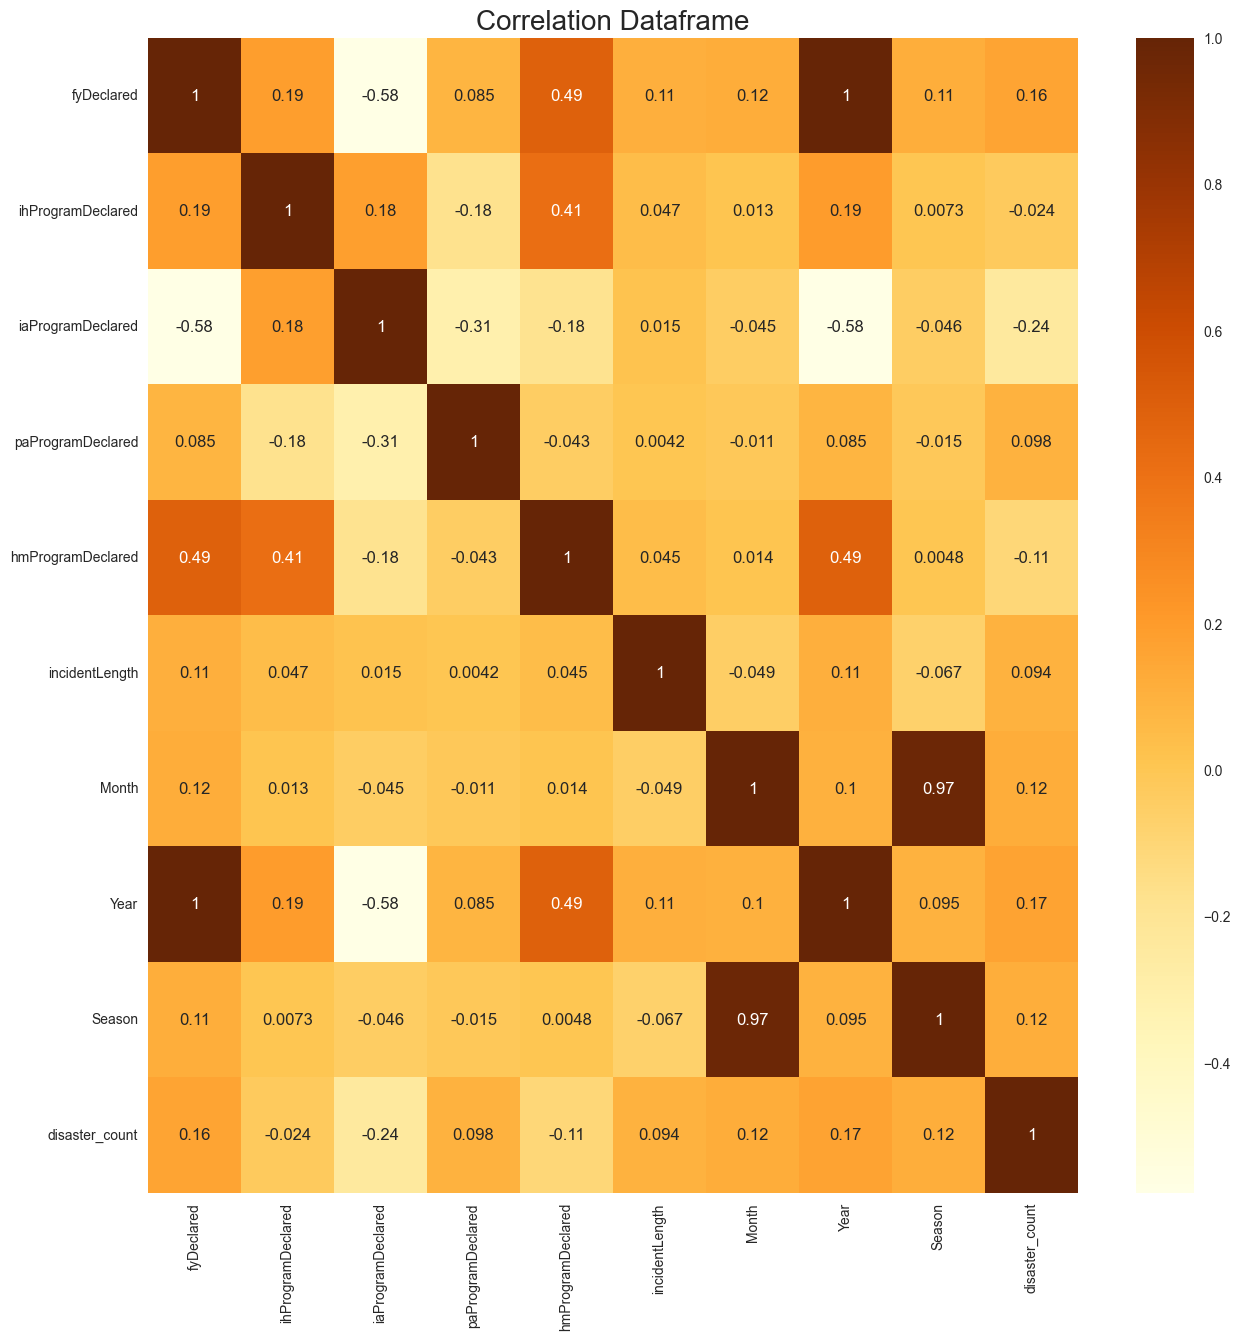

In [20]:
#heatmap for correlation dataframe
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(data=corr_df, cmap = 'YlOrBr', annot = True)
ax.set_title("Correlation Dataframe", fontsize = 20)
plt.show()

In [21]:
cbe = ce.CatBoostEncoder(cols=['incidentType'])
df['incidentType_ce_CBE'] = cbe.fit_transform(df['incidentType'],df['disaster_count'])
df.head()

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season,disaster_count,incidentType_ce_CBE
disasterNumber,,,,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2,9.0,722.010872
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2,9.0,365.505436
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2,9.0,722.010872
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2,9.0,246.670291
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2,9.0,365.505436


In [22]:
cbe = ce.CatBoostEncoder(cols=['state'])
df['state_ce_CBE'] = cbe.fit_transform(df['state'],df['disaster_count'])
df.head()

,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season,disaster_count,incidentType_ce_CBE,state_ce_CBE
disasterNumber,,,,,,,,,,,,,,,,,,,
1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2,9.0,722.010872,722.010872
2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2,9.0,365.505436,722.010872
3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2,9.0,722.010872,722.010872
4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2,9.0,246.670291,722.010872
5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2,9.0,365.505436,722.010872


In [23]:
# Convert the "declarationType" column to a categorical data type to optimize memory usage
df["declarationType"] = pd.Categorical(df["declarationType"])

# Use the get_dummies function to one-hot encode the "declarationType" column
one_hot_encoded = pd.get_dummies(df["declarationType"])

# Add the one-hot encoded columns back to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original "declarationType" column, since it is no longer needed
df = df.drop("declarationType", axis=1)

In [24]:
df.head()

,state,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength,Month,Year,Season,disaster_count,incidentType_ce_CBE,state_ce_CBE,DR,EM,FM
disasterNumber,,,,,,,,,,,,,,,,,,,,,
1,GA,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0,5,1953,2,9.0,722.010872,722.010872,1,0,0
2,TX,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0,5,1953,2,9.0,365.505436,722.010872,1,0,0
3,LA,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0,5,1953,2,9.0,722.010872,722.010872,1,0,0
4,MI,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0,6,1953,2,9.0,246.670291,722.010872,1,0,0
5,MT,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0,6,1953,2,9.0,365.505436,722.010872,1,0,0


In [25]:
df = df.drop(['incidentType', 'state','declarationTitle','incidentBeginDate', 'incidentEndDate','designatedArea', 'fyDeclared'], axis = 1)

In [26]:
X = df.drop(['disaster_count'], axis=1)
y =df['disaster_count']

In [27]:
#making test and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 23)
dummy_mean = DummyRegressor(strategy = 'mean')
#Training dummy regressor
dummy_mean.fit(X_train, y_train)
#Getting R-squared score
score_mean = dummy_mean.score(X_test, y_test)
print('The R2 score when using the mean to predict X:', score_mean)

The R2 score when using the mean to predict X: -3.149174911509789e-05


In [28]:

grid = setup(data = df, target = 'disaster_count', train_size = .8, fold = 5, normalize = True, ignore_features = [], numeric_features = [], silent = True)

# Evaluate models and compare models
best = compare_models()

# Report the best model
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.9912,515.1827,21.9620,0.9995,0.1040,0.0264,1.3520
et,Extra Trees Regressor,2.2187,655.6263,24.2982,0.9993,0.1120,0.0309,0.7220
dt,Decision Tree Regressor,1.1865,781.6007,26.2365,0.9992,0.1017,0.0168,0.0540
catboost,CatBoost Regressor,17.1037,898.5880,29.9377,0.9991,0.2107,0.1295,2.5060
xgboost,Extreme Gradient Boosting,13.4803,1022.3265,31.1956,0.9989,0.1850,0.0984,0.8800
knn,K Neighbors Regressor,3.2253,2173.6740,45.7323,0.9977,0.1255,0.0335,0.0880
lightgbm,Light Gradient Boosting Machine,30.7913,2797.1412,52.4061,0.9971,0.2941,0.2341,0.2220
gbr,Gradient Boosting Regressor,127.6105,47750.3763,218.4577,0.9498,0.5715,0.6675,0.8540
ada,AdaBoost Regressor,180.3380,57890.6860,240.5068,0.9392,0.7217,1.0315,0.3260
lasso,Lasso Regression,497.0163,579996.1792,761.3576,0.3908,1.0795,1.9003,0.4200


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=692, verbose=0, warm_start=False)


In [29]:
df.to_csv(r'C:\Users\colem\OneDrive\Documents\Springboard\Disaster_Project\disaster_df_preprocessed.csv', index = False)